In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import random 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [31]:
from sklearn.datasets import load_boston

In [32]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [33]:
# print(load_boston()['DESCR'])

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Все данные числовые, нет пропущенных значений

In [35]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Нет "подозрительных данных" - отрицательных, нулевых, неправдоподобно больших значений

<AxesSubplot:>

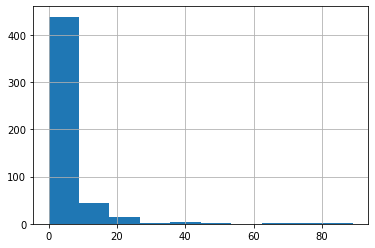

In [36]:
data.CRIM.hist()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CRIM'>

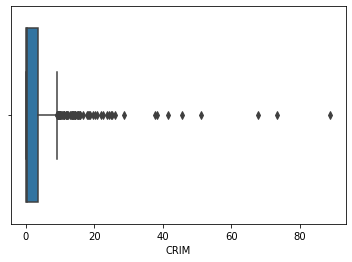

In [37]:
sns.boxplot(data['CRIM'])

In [38]:
data = data[data['CRIM'] < 35] #избавимся от выбросов

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     498 non-null    float64
 1   ZN       498 non-null    float64
 2   INDUS    498 non-null    float64
 3   CHAS     498 non-null    int64  
 4   NOX      498 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      498 non-null    float64
 7   DIS      498 non-null    float64
 8   RAD      498 non-null    int64  
 9   TAX      498 non-null    int64  
 10  PTRATIO  498 non-null    float64
 11  B        498 non-null    float64
 12  LSTAT    498 non-null    float64
 13  MEDV     498 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 58.4 KB


In [40]:
# data.ZN.hist()

In [41]:
# data.B.hist()

In [42]:
# sns.boxplot(data['B'])

In [43]:
# data = data[data['B'] > 300]

In [44]:
# data.info()

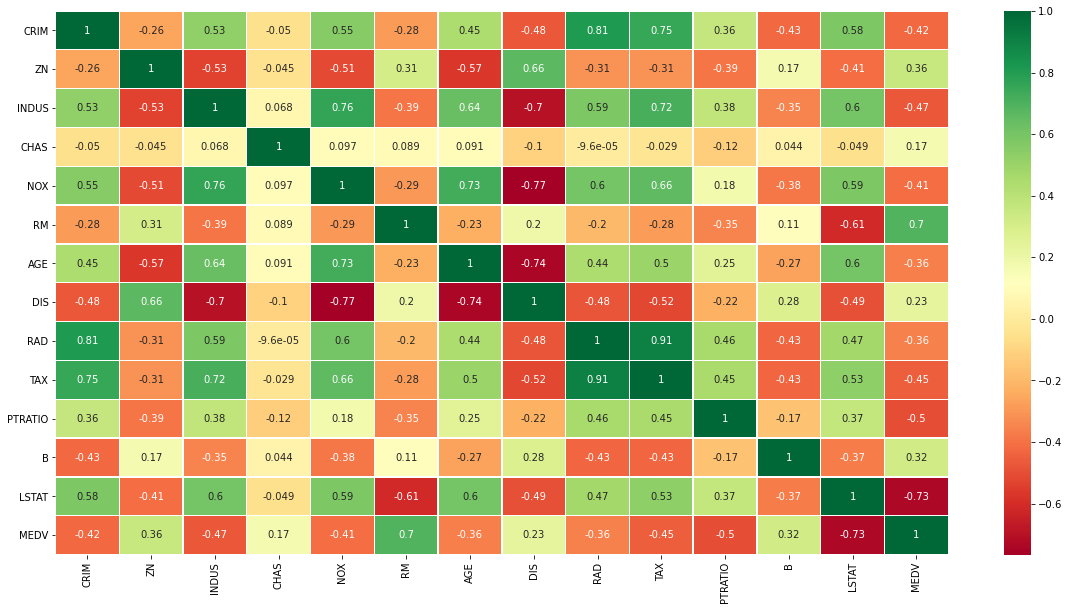

In [45]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.4) 

fig=plt.gcf()

fig.set_size_inches(20, 10)
plt.show()

Коэффициент корреляции между RAD ( index of accessibility to radial highways) и TAX ( full-value property-tax rate per $10,000) близок к 1, то есть есть сильная прямая линейная зависимость => один из признаков можно удалить. Удалим TAX.

Коэффициент корреляции между NOX ( nitric oxides concentration (parts per 10 million) ) и DIS ( weighted distances to five Boston employment centres ) близок к -1, то есть есть обратно пропорциональная зависимость => удалим NOX

Коэффициент корреляции между AGE ( proportion of owner-occupied units built prior to 1940 ) и DIS ( weighted distances to five Boston employment centres ) близок к -1, то есть есть обратно пропорциональная зависимость => удалим AGE

Модель коэффициента корреляции между цлевой переменной MEDV и переменными RM и LSTAT также высок => есть линейная зависимость

In [46]:
data.drop(['TAX', 'NOX', 'AGE'], axis='columns', inplace=True)
data

,CRIM,ZN,INDUS,CHAS,RM,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,6.575,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,6.0622,3,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,6.593,2.4786,1,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,6.120,2.2875,1,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,6.976,2.1675,1,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,6.794,2.3889,1,21.0,393.45,6.48,22.0


In [47]:
# data.describe()

In [48]:
# data['CHAS'].value_counts()

In [49]:
y = data.MEDV

In [50]:
x = data[['CRIM', 'ZN', 'INDUS', 'CHAS',  'RM', 'DIS', 'RAD',  'PTRATIO', 'B', 'LSTAT']]

In [51]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


model = make_pipeline(StandardScaler(),LinearRegression())

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=400)

In [53]:
model.fit( x_train, y_train )
predictions = model.predict( x_test )


In [54]:
model.score(x_train, y_train)

0.6863980239514196

In [55]:
model.score(x_test, y_test)

0.7876596896528244

Еще можно, например, так посмотерть качество модели - найдем коэффициенты, смещение, ошибку

In [56]:
from sklearn.metrics import mean_absolute_error

reg = LinearRegression().fit(x_train, y_train)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(x_test)
print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [-0.03794903  0.04752836 -0.11241565  3.12226914  3.82721784 -1.09528601
  0.07630984 -0.81886175  0.01060409 -0.61813131]
Bias: 21.954949528172307
Error: 2.874449981312907
